In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("kmeans.csv")
print(df)

    x  y
0   1  1
1   2  2
2   2  3
3   1  4
4   3  3
5   6  7
6   7  8
7   6  8
8   7  6
9   6  9
10  2  5
11  7  8
12  8  9
13  6  7
14  7  8
15  3  1
16  8  4
17  8  6
18  8  9


Xem các điểm dữ liệu trên biểu đồ

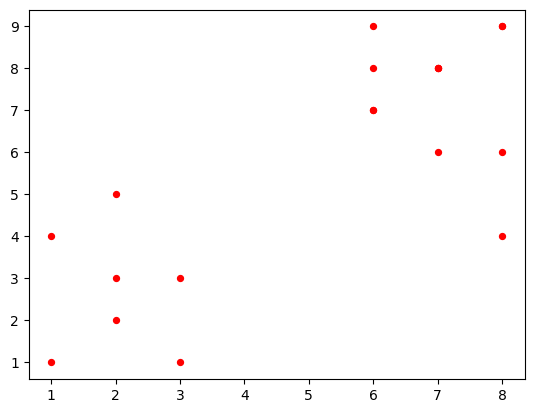

In [5]:
plt.scatter(df['x'].values, df['y'].values, c='r', s=18)
plt.show()

## Bắt đầu phân cụm với 3 cụm

[[6. 4.]
 [5. 5.]
 [5. 7.]]


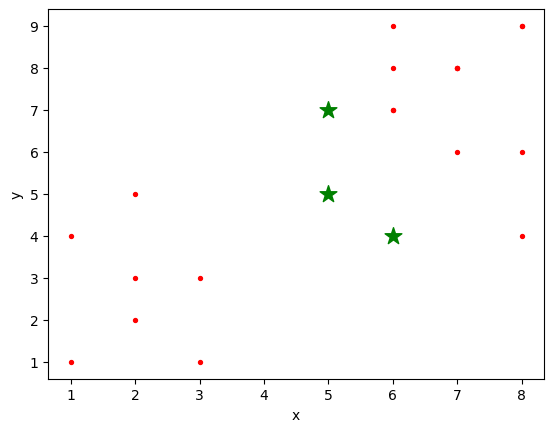

In [28]:
#---let k assume a value---
k = 3
#---create a matrix containing all points---
X = np.array(list(zip(df['x'],df['y'])))
#---generate k random points (centroids)---
Cx = np.random.randint(np.min(X[:, 0]), np.max(X[:, 0]), size=k)
Cy = np.random.randint(np.min(X[:, 1]), np.max(X[:, 1]), size=k)
#---represent the k centroids as a matrix---
C = np.array(list(zip(Cx, Cy)), dtype=np.float64)
print(C)
#---plot the orginal points as well as the k centroids---
plt.scatter(df['x'], df['y'], c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

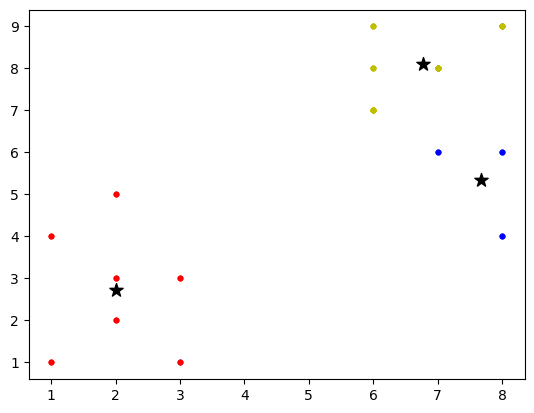

In [29]:
from copy import deepcopy
#---to calculate the distance between two points---
def euclidean_distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)
#---create a matrix of 0 with same dimension as C (centroids)---
C_prev = np.zeros(C.shape)
#---to store the cluster each point belongs to---
clusters = np.zeros(len(X))
#---C is the random centroids and C_prev is all 0s---
#---measure the distance between the centroids and C_prev---
distance_differences = euclidean_distance(C, C_prev)
#---loop as long as there is still a difference in
# distance between the previous and current centroids---
while distance_differences.any() != 0:
    #---assign each value to its closest cluster---
    for i in range(len(X)):
        distances = euclidean_distance(X[i], C)
        #---returns the indices of the minimum values along an axis---
        cluster = np.argmin(distances)
        clusters[i] = cluster
    #---store the prev centroids---
    C_prev = deepcopy(C)
    #---find the new centroids by taking the average value---
    for i in range(k): #---k is the number of clusters---
        #---take all the points in cluster i---
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points) != 0:
            C[i] = np.mean(points, axis=0)
    #---find the distances between the old centroids and the new centroids---
    distance_differences = euclidean_distance(C, C_prev)
    #---plot the scatter plot---
    colors = ['b','r','y','g','c','m']
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        if len(points) > 0:
            plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
        else:
            # this means that one of the clusters has no points
            print("Plesae regenerate your centroids again.")
plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
plt.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')
plt.show()

## Kết quả phân cụm 

In [30]:
for i, cluster in enumerate(clusters):
    print("Point " + str(X[i]), "Cluster " + str(int(cluster)))

Point [1 1] Cluster 1
Point [2 2] Cluster 1
Point [2 3] Cluster 1
Point [1 4] Cluster 1
Point [3 3] Cluster 1
Point [6 7] Cluster 2
Point [7 8] Cluster 2
Point [6 8] Cluster 2
Point [7 6] Cluster 0
Point [6 9] Cluster 2
Point [2 5] Cluster 1
Point [7 8] Cluster 2
Point [8 9] Cluster 2
Point [6 7] Cluster 2
Point [7 8] Cluster 2
Point [3 1] Cluster 1
Point [8 4] Cluster 0
Point [8 6] Cluster 0
Point [8 9] Cluster 2


### Các điểm mẫu

In [31]:
print(C)
'''
[[2.         1.33333333]
 [7.         7.41666667]
 [2.         3.75      ]]
'''

[[7.66666667 5.33333333]
 [2.         2.71428571]
 [6.77777778 8.11111111]]


'\n[[2.         1.33333333]\n [7.         7.41666667]\n [2.         3.75      ]]\n'

# Sử dụng sklearn triển khai K-Means

In [16]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)

In [19]:
labels = kmeans.predict(X) # nhãn phân cụm của từng điểm
centroids = kmeans.cluster_centers_ # lấy tọa độ các điểm mẫu
print(labels)
print(centroids)
X

[1 1 1 1 1 0 0 0 2 0 1 0 0 0 0 1 2 2 0]
[[6.77777778 8.11111111]
 [2.         2.71428571]
 [7.66666667 5.33333333]]


array([[1, 1],
       [2, 2],
       [2, 3],
       [1, 4],
       [3, 3],
       [6, 7],
       [7, 8],
       [6, 8],
       [7, 6],
       [6, 9],
       [2, 5],
       [7, 8],
       [8, 9],
       [6, 7],
       [7, 8],
       [3, 1],
       [8, 4],
       [8, 6],
       [8, 9]])

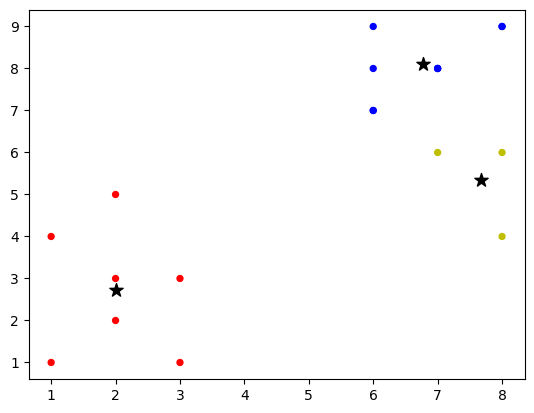

In [20]:
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['x'],df['y'], c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')
plt.show()

In [32]:
#---making predictions---
cluster = kmeans.predict([[3,4]])[0]
print(c[cluster]) # r
cluster = kmeans.predict([[7,5]])[0]
print(c[cluster]) # y

r
y
